### Import libraries

In [1]:
import pandas as pd
import os
import shutil
import sys
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
from tensorflow import keras
import tensorflow


from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

### Check out the directories

In [2]:
# inserting the parent directory into current path
sys.path.insert(1, '../COVID_19/')

In [3]:
os.listdir('../Dataset_4_classe/')

['.DS_Store', 'Train', 'Val']

In [4]:
os.listdir('../Dataset_4_classe/Train/')

['.DS_Store', 'Pneumocystis', 'NORMAL', 'Streptococcus', 'Covid']

In [5]:
Train_NORMAL = os.listdir('../Dataset_4_classe/Train/NORMAL/')
print('Train_NORMAL = ', len(Train_NORMAL))

Train_Pneumocystis = os.listdir('../Dataset_4_classe/Train/Pneumocystis/')
print('Train_Pneumocystis = ', len(Train_Pneumocystis))

Train_Streptococcus = os.listdir('../Dataset_4_classe/Train/Streptococcus/')
print('Train_Streptococcus = ', len(Train_Streptococcus))

Train_Covid = os.listdir('../Dataset_4_classe/Train/Covid/')
print('Train_Covid = ', len(Train_Covid))

Train_NORMAL =  167
Train_Pneumocystis =  19
Train_Streptococcus =  11
Train_Covid =  167


In [6]:
Val_NORMAL = os.listdir('../Dataset_4_classe/Val/NORMAL/')
print('Val_NORMAL = ', len(Val_NORMAL))

Val_Pneumocystis = os.listdir('../Dataset_4_classe/Val/Pneumocystis/')
print('Val_Pneumocystis = ', len(Val_Pneumocystis))

Val_Streptococcus = os.listdir('../Dataset_4_classe/Val/Streptococcus/')
print('Val_Streptococcus = ', len(Val_Streptococcus))

Val_Covid = os.listdir('../Dataset_4_classe/Val/Covid/')
print('Val_Covid = ', len(Val_Covid))

Val_NORMAL =  31
Val_Pneumocystis =  4
Val_Streptococcus =  3
Val_Covid =  31


## Quick look to the images 

In [7]:
print('Images_names \n ', 
      Train_NORMAL[0], '\n' ,
      Train_Covid[0], '\n' ,
      Train_Pneumocystis[0], '\n' , 
      Train_Streptococcus[1])

Images_names 
  NORMAL2-IM-1056-0001.jpeg 
 f6d980a0.jpg 
 26eecee1e498237cc3ea3274b79ff0_jumbo.jpg 
 cavitating-pneumonia-4-day0-PA.jpg


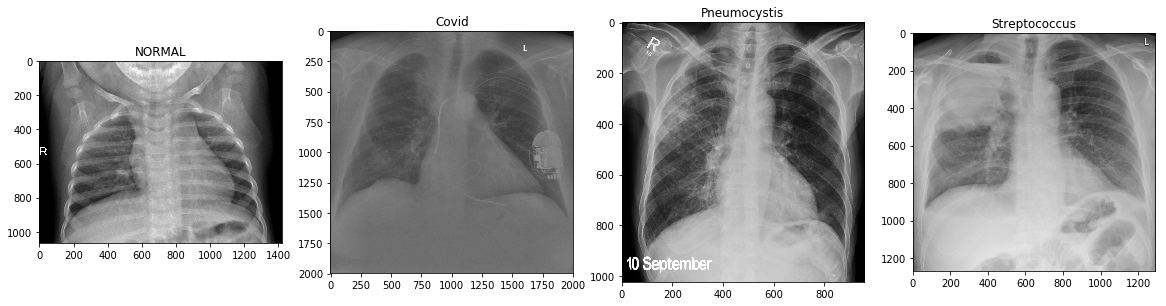

In [8]:
# ref https://www.kaggle.com/feyzazkefe/pneumonia-detection-using-cnn-89-42-acc

img_name = 'NORMAL2-IM-1056-0001.jpeg'
img_normal = load_img('../Dataset_4_classe/Train/NORMAL/' + img_name)

img_name_1 = 'f6d980a0.jpg'
img_Covid = load_img('../Dataset_4_classe/Train/Covid/' + img_name_1)

img_name_2 = '26eecee1e498237cc3ea3274b79ff0_jumbo.jpg'
img_Pneumocystis = load_img('../Dataset_4_classe/Train/Pneumocystis/' + img_name_2)

img_name_3 = 'cavitating-pneumonia-4-day0-PA.jpg'
img_Streptococcus = load_img('../Dataset_4_classe/Train/Streptococcus/' + img_name_3)



fig, axs = plt.subplots(1,4,figsize=(20,10))
axs[0].imshow(img_normal)
axs[0].set_title("NORMAL")

axs[1].imshow(img_Covid)
axs[1].set_title("Covid");


axs[2].imshow(img_Pneumocystis)
axs[2].set_title("Pneumocystis")

axs[3].imshow(img_Streptococcus)
axs[3].set_title("Streptococcus");


plt.savefig("../Assets/plot_01_assets_1_4classes.png")

### Assemble CNN model

In [9]:
model = Sequential()
activ = 'sigmoid'

model.add(Conv2D(32, kernel_size=(3,3),
                 activation=activ,
                 input_shape=(224,224,3)))
model.add(BatchNormalization())


model.add(Conv2D(64, kernel_size=(3,3),
                 activation=activ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))



model.add(Conv2D(64, kernel_size=(3,3),
                 activation=activ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))



model.add(Conv2D(128, kernel_size=(3,3),
                 activation=activ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(64, activation=activ))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Metrics

In [10]:
# metr_auc = tensorflow.keras.metrics.AUC(num_thresholds=200, curve='ROC')
# TP = tensorflow.keras.metrics.TruePositives(thresholds=None, name=None, dtype=None)
# TN = tensorflow.keras.metrics.TrueNegatives(thresholds=None, name=None, dtype=None)
# FP = tensorflow.keras.metrics.FalsePositives(thresholds=None, name=None, dtype=None)
# FN = tensorflow.keras.metrics.FalseNegatives(thresholds=None, name=None, dtype=None)

# Recall_metr = tensorflow.keras.metrics.Recall(thresholds=None, top_k=None, 
#                 class_id=None, name=None, dtype=None)
# mtr_list = ['accuracy','mse', metr_auc,TP,TN,FP,FN]
# mtr_list = ['accuracy']

any time that you have several images (multiclass classification), use two to three convolution layers.
Also,a use softmax as activation for the last layer as I did above (my recommendation but you may test other types either).
Note that the categorical_crossentropy isalmost default for multiclass classifiers.

remember that we always use convolution layers for images. the reason is if we use dense layers we will lose positional information in images.

In [11]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='rmsprop', 
              metrics=['accuracy'])


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 222, 222, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 220, 220, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
__________

### Prepare the data

resacle does normalization.
Augment the data set for both train and val.
Then use flow to apply the data augmention.

In [23]:
train_datagen = image.ImageDataGenerator(
                featurewise_center=False, samplewise_center=False,
                featurewise_std_normalization=False, samplewise_std_normalization=False,
                zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
                height_shift_range=0.0, brightness_range=None, shear_range=0.2, zoom_range=0.2,
                channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
                horizontal_flip=True, vertical_flip=False, rescale=1./255,
                preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)

for val data set just apply rescale function.

In [24]:
val_dataset = image.ImageDataGenerator(rescale=1./255)

In [25]:
train_generator = train_datagen.flow_from_directory(
                    directory='../Dataset_4_classe/Train/',
                    target_size=(224,224),
                    color_mode="rgb",
                    classes=None,
                    class_mode="categorical",
                    batch_size=32,
                    shuffle=True,
                    seed=1234,
                    save_to_dir=None,
                    save_prefix="",
                    save_format="png",
                    follow_links=False,
                    subset=None,
                    interpolation="nearest")

Found 360 images belonging to 4 classes.


In [26]:
validation_generator = val_dataset.flow_from_directory(
                    directory='../Dataset_4_classe/val/',
                    target_size=(224,224),
                    color_mode="rgb",
                    classes=None,
                    class_mode="categorical",
                    batch_size=32,
                    shuffle=True,
                    seed=1234,
                    save_to_dir=None,
                    save_prefix="",
                    save_format="png",
                    follow_links=False,
                    subset=None,
                    interpolation="nearest")

Found 65 images belonging to 4 classes.


In [16]:
# validation_generator = test_dataset.flow_from_directory(
#                         '../COVID_19/Dataset/val/',
#                         target_size =(224,224),
#                         batch_size = 32,
#                         class_mode ='binary')

### Show some images after data augmentation

In [17]:
image_batch, label_batch = next(iter(train_generator))

In [18]:
label_batch

array([0., 0., 0., 0., 0., 0., 0., 1., 2., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 2., 1., 1., 0., 1., 3., 1., 1., 1., 1., 1., 0., 1., 0.],
      dtype=float32)

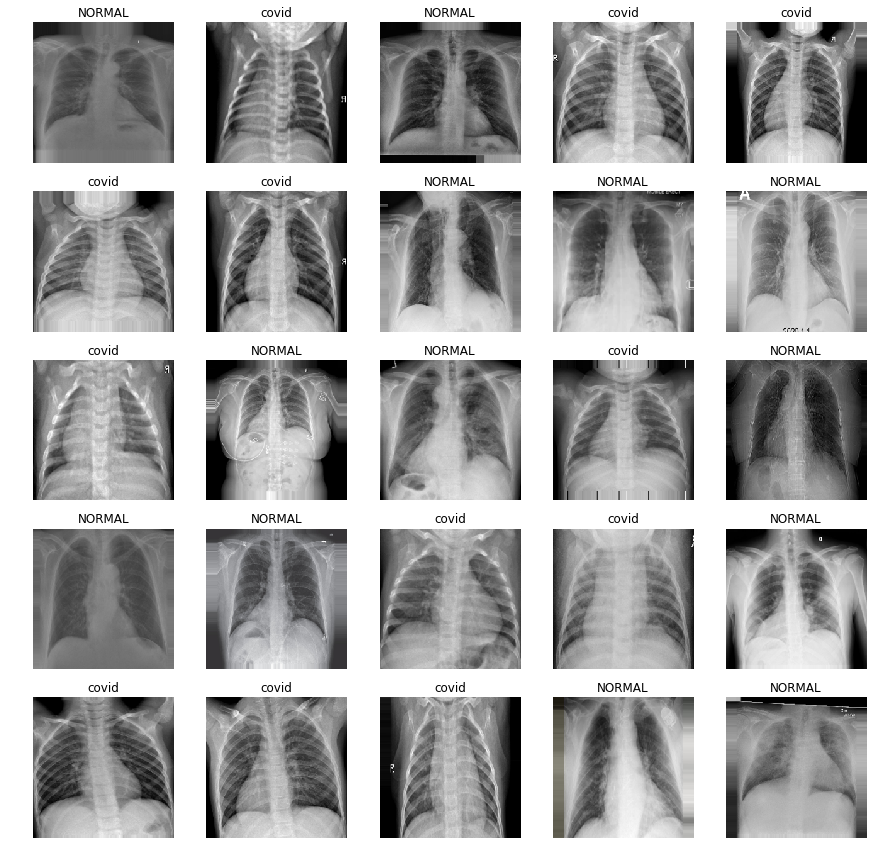

In [19]:
# ref https://www.kaggle.com/feyzazkefe/pneumonia-detection-using-cnn-89-42-acc
image_batch, label_batch = next(iter(train_generator))

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(15, 15))
    for n in range(25):
        ax = plt.subplot(5, 5, n + 1)
        plt.imshow(image_batch[n])
        if label_batch[n]==0:
            plt.title("NORMAL")
        elif label_batch[n]==1:
            plt.title("covid")
        elif label_batch[n]==2:
            plt.title("Pneumocystis")
        else:
            plt.title("Streptococcus")
        plt.axis("off")

show_batch(image_batch, label_batch)
plt.savefig("../Assets/plot_01_assets_2_4classes.png")

### Train the CNN model

In [27]:
# model_history = model.fit_generator(
#                 generator=train_generator, 
#                 steps_per_epoch=8, 
#                 epochs=10, 
#                 verbose=1, 
#                 callbacks=None,
#                 validation_data= validation_generator, 
#                 validation_steps=2, 
#                 class_weight=None, 
#                 max_queue_size=10, 
#                 workers=1, 
#                 use_multiprocessing=False,
#                 shuffle=True, 
#                 initial_epoch=0
#             )


model_history = model.fit_generator(
                generator=train_generator, 
                steps_per_epoch=8, 
                epochs=10, 
                validation_data= validation_generator)

Epoch 1/10
12/12 [==============================] - 96s 8s/step - loss: 1.3336 - acc: 0.4250 - val_loss: 0.9383 - val_acc: 0.4615
Epoch 2/10
12/12 [==============================] - 96s 8s/step - loss: 1.1853 - acc: 0.4889 - val_loss: 0.9079 - val_acc: 0.4615
Epoch 3/10
12/12 [==============================] - 88s 7s/step - loss: 1.0225 - acc: 0.5972 - val_loss: 0.8953 - val_acc: 0.4615
Epoch 4/10
12/12 [==============================] - 90s 7s/step - loss: 0.7908 - acc: 0.7389 - val_loss: 0.9525 - val_acc: 0.4615
Epoch 5/10
12/12 [==============================] - 89s 7s/step - loss: 0.7182 - acc: 0.7583 - val_loss: 1.0261 - val_acc: 0.4615
Epoch 6/10
12/12 [==============================] - 87s 7s/step - loss: 0.6268 - acc: 0.8278 - val_loss: 0.8249 - val_acc: 0.4615
Epoch 7/10
12/12 [==============================] - 87s 7s/step - loss: 0.6294 - acc: 0.8222 - val_loss: 0.8221 - val_acc: 0.4615
Epoch 8/10
12/12 [==============================] - 87s 7s/step - loss: 0.6107 - acc: 0.80

### Plot the History

In [28]:
# list all data in history
print('len(model_history.history.keys()) \n', len(model_history.history.keys()),'\n')
print(model_history.history.keys())

len(model_history.history.keys()) 
 4 

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [29]:
model_history_df = pd.DataFrame(model_history.history)
model_history_df

,loss,acc,val_loss,val_acc
0,1.360876,0.425000,0.938322,0.461538
1,1.192467,0.488889,0.907874,0.461538
2,1.019324,0.597222,0.895283,0.461538
3,0.773241,0.738889,0.952479,0.461538
4,0.726393,0.758333,1.026075,0.461538
5,0.597512,0.827778,0.824929,0.461538
6,0.635427,0.822222,0.822059,0.461538
7,0.628777,0.808333,1.219999,0.461538
8,0.580325,0.836111,2.624579,0.461538
9,0.554482,0.816667,2.765702,0.461538


In [30]:
model_history_df.columns

Index(['loss', 'acc', 'val_loss', 'val_acc'], dtype='object')

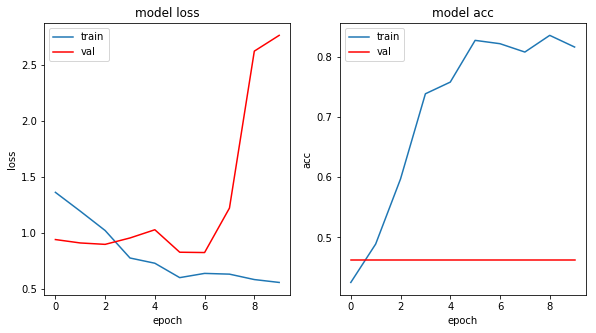

In [33]:
plt.figure(figsize=(15,17))
# columns = ['loss', 'accuracy', 'mse', 'auc', 'true_positives', 'true_negatives',
#            'false_positives', 'false_negatives']
columns = ['loss', 'acc']
for i,col in enumerate(columns):
    
    plt.subplot(3, 3, i+1)
    
    plt.plot(model_history_df[col])
    plt.plot(model_history_df['val_'+col], color='red')
    plt.title('model '+col)
    plt.ylabel(col)
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])
    
plt.savefig("../Figures/plot_01_1_4classes.png")

In [34]:
model.save("../Codes/Models/model_covid_test_4classes.h5")